# 감정 분석(Sentiment Analysis)
감정 분석은 텍스트에 등장하는 단어들을 통해 어떤 감정이 드러나는지 분석하는 기법

감정 분석은 오피니언 마이닝으로도 불리며, 텍스트에 담긴 의견, 태도 등을 
알아보는데 유용한 기법

감정 분석을 하기 위해선 미리 정의된 감정 어휘 사전이 필요

감정 어휘 사전에 포함된 어휘가 텍스트에 얼마나 분포하는지에 따라 해당 텍스트의 감정이 좌우

토픽 모델링이 텍스트의 주제를 찾아낸다면, 감정 분석은 텍스트의 의견을 찾아냄

텍스트는 주제(토픽)와 의견(감정)의 결합으로 이루어졌다고 볼 수 있음

감정 분석은 SNS, 리뷰 분석에 유용하게 사용할 수 있음

특정 이슈에 대한 사람들의 감정을 실시간으로 분석한다면, 그에 대해 신속하게 대처 가능

파이썬으로 감정 분석하는 방법은 크게 두 가지로 구분

1. 감정 어휘 사전을 이용한 감정 상태 분류

1) 미리 분류해둔 감정어 사전을 통해 분석하고자 하는 텍스트의 단어들을 사전에 기반해 분류하고, 그 감정가를 계산

2) 이 때 사용되는 감정어 사전에는 해당 감정에 해당되는 단어를 미리 정의해둬야 함

2. 기계학습을 이용한 감정 상태 분류

1) 분석 데이터의 일부를 훈련 데이터로 사용해 그로부터 텍스트의 감정 상태를 분류

2) 이 때 사용되는 훈련 데이터는 사용자가 분류한 감정 라벨이 포함되어 있어야 하며,
이를 인공 신경망, 의사 결정 트리 등의 기계 학습 알고리즘을 사용하여 분류

In [2]:
!pip install afinn

  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53449 sha256=26d277d0242db6bb49882644b11e4a4a19b4b6dec5cbd33775a5b45dc275880f
  Stored in directory: c:\users\이신행\appdata\local\pip\cache\wheels\9d\16\3a\9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [3]:
from sklearn.datasets import fetch_20newsgroups

newsdata=fetch_20newsgroups(subset='train')
newsdata.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [5]:
from afinn import Afinn

afinn=Afinn()
for i in range(10):
    print(afinn.score(newsdata.data[i]))

7.0
11.0
16.0
5.0
-23.0
-25.0
7.0
3.0
16.0
-20.0


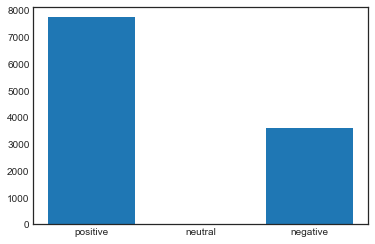

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

positive=0
neutral=0
negative=0

for i in newsdata.data:
    score=afinn.score(i)
    if score >=0 :
        positive+=1
    elif score==0:
        neutral+=1
    else:
        negative+=1
        
plt.bar(np.arange(3),[positive,neutral,negative])
plt.xticks(np.arange(3),['positive','neutral','negative'])
plt.show()

In [8]:
!set -x\
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

-x  환경 변수가 정의되지 않았습니다.
